# (not) CASiMiR

This is a demonstration of the WC-WAVE simplified, open source version of the CASiMiR model. The model operates on a yearly timescale. The inputs required are a vegetation map, a map of shear stress casued by flooding, and a JSON lookup file that maps vegetation codes to resistance to shear stress. If the shear stress exceeds the resistance at a grid cell, the vegetation is set to "age zero" at that cell. This means that the same vegetation that was once there will still "grow", but from a "seedling". 

In practice, there are six different vegetation types currently. There is still some generalization work to be done since this has been developed specifically for the Jemez River.

## Example code

Below we show how to run the code and visualize the results using a simple 4x5 grid using file paths as input. After that we'll show how to load the files into `ESRIAsc` objects, which will be useful for demonstrating what's going on.

The output type is ESRIAsc


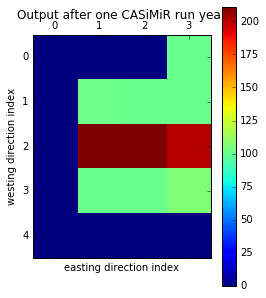

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
# enable import of vwpy objects
sys.path.append('../../')

from vwpy.dflow_casimir import casimir, ESRIAsc

# set up paths to files
veg_ascii_file = 'vegcode.asc'
shear_ascii_file = 'shear.asc'
veg_resistance_lookup = 'resistance.json'

# run CASiMiR
veg_output = casimir(veg_ascii_file, shear_ascii_file, veg_resistance_lookup)

print "The output type is " + veg_output.__class__.__name__

plt.figure(figsize=(5,6))
plt.matshow(veg_output.as_matrix(replace_nodata_val=0.0))
plt.title('Output after one CASiMiR run year')
plt.xlabel('easting direction index')
plt.ylabel('westing direction index')
plt.colorbar()

The `ESRIAsc` type contains all the information an ESRI .asc has in its header as attributes:

* ncols
* nrows
* xllcorner
* yllcorner
* NODATA_value
* cellsize

So you can use cellsize and the corners to make better x and y ticks and labels that are more physically meaningful using the [matplotlib.pyplot.xticks](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xticks) and [matplotlib.pyplot.yticks](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.yticks) methods.

## Deeper look at CASiMiR process

Now we'll show another way to use CASiMiR--by first loading the vegetation ans shear data into an `ESRIAsc` object and loading the `resistance.json` file into a Python dictionary using the [standard library's json module](https://docs.python.org/2/library/json.html)

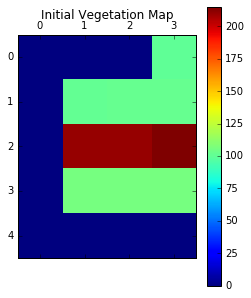

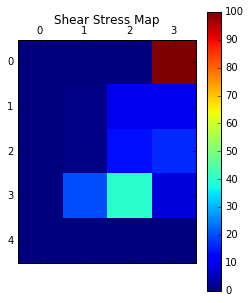

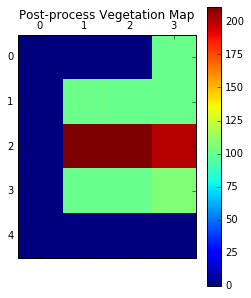

In [10]:
import json

veg_map = ESRIAsc(veg_ascii_file)
shear_map = ESRIAsc(shear_ascii_file)
shear_resistance_dict = json.load(open(veg_resistance_lookup))

plt.figure()
plt.matshow(veg_map.as_matrix(replace_nodata_val=0.0))
plt.title('Initial Vegetation Map')
plt.colorbar()

plt.figure()
plt.matshow(shear_map.as_matrix(replace_nodata_val=0.0))
plt.title('Shear Stress Map')
plt.colorbar()

veg_output = casimir(veg_map, shear_map, shear_resistance_dict)

plt.figure()
plt.matshow(veg_output.as_matrix(replace_nodata_val=0.0))
plt.title('Post-process Vegetation Map')
plt.colorbar()